http://pklab.med.harvard.edu/scw2014/subpop_tutorial.html

In [1]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.6.1  IRdisplay_0.7.0 pbdZMQ_0.3-3    tools_3.6.1    
 [5] htmltools_0.3.6 pillar_1.4.2    base64enc_0.1-3 crayon_1.3.4   
 [9] Rcpp_1.0.3      uuid_0.1-2      IRkernel_1.0.2  jsonlite_1.6   
[13] digest_0.6.23   repr_1.0.1      rlang_0.4.2     evaluate_0.14  

In [2]:
library(DESeq)
library(statmod)
library(fastICA)
library(ggplot2)

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with


In [3]:
directory <-"/home/jovyan/work/fvalle/phd/datasets/tcga/oversampling_10tissue"

In [4]:
targets <- read.delim(paste(directory,"/files.dat", sep=''), sep=',', row.names=1)
head(targets)

,malignacy,grade,primary_site,disease_type,stage,submitter_id,recurrence,tcga_id
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
b91d49a7-086e-4617-ba5e-9369268c13c6.htseq.counts.gz,no,not reported,Uterus,Uterine Corpus Endometrial Carcinoma,not reported,TCGA-BG-A0LW,not reported,TCGA-BG-A0LW-01A-11R-A16W-07
213d57e8-a4e9-4f31-b711-a80ddfe644b7.htseq.counts.gz,yes,not reported,Lung,Lung Adenocarcinoma,stage iv,TCGA-05-4434,not reported,TCGA-05-4434-01A-01R-1206-07
b0937926-a768-41bd-80bc-68d4e5743f8c.htseq.counts.gz,no,not reported,Lung,Lung Adenocarcinoma,stage ia,TCGA-49-4487,not reported,TCGA-49-4487-01A-21R-1858-07
c63458fd-9b68-40d2-86a4-dc69f9946c36.htseq.counts.gz,no,not reported,Lung,Lung Adenocarcinoma,stage ib,TCGA-44-3917,not reported,TCGA-44-3917-01B-02R-A277-07
99946511-4d29-4d85-9789-6b326261eb0c.htseq.counts.gz,no,not reported,Thyroid,Thyroid Carcinoma,stage ii,TCGA-EL-A3ZQ,not reported,TCGA-EL-A3ZQ-01A-11R-A23N-07
3c3c7702-7b2f-40b9-abad-5c7b276f811f.htseq.counts.gz,no,not reported,Prostate,Prostate Adenocarcinoma,not reported,TCGA-YL-A8SI,not reported,TCGA-YL-A8SI-01A-11R-A41O-07


In [18]:
rawdata <- read.delim(paste(directory,"/mainTable_all.csv", sep=''), sep=',', row.names=1)
head(rawdata)

,efb7b03d.e283.47be.9233.edf945abb012.htseq.counts.gz,da09dd77.0b91.4795.bd80.f90a9784b65c.htseq.counts.gz,X495fe6cb.7649.4434.98cd.214f1b842907.htseq.counts.gz,cf9410ef.5f77.4055.850e.5d764b502a68.htseq.counts.gz,X8166ba38.a099.4a07.8271.0587fe8d10d7.htseq.counts.gz,af11caa0.a20b.4c17.8207.0a1142edd9a9.htseq.counts.gz,X48f5bb9b.70c0.4d4d.a788.302af259ec92.htseq.counts.gz,X97d62176.1e34.4508.886b.df643f8a7e75.htseq.counts.gz,d69d82f1.1173.42d6.8433.d5ab7e7ab59b.htseq.counts.gz,ac91dc28.0218.449a.bf40.9f1ea55c56ac.htseq.counts.gz,⋯,eeff4d01.f161.423f.9d6d.d2d31cc69047.htseq.counts.gz,aa47670a.4c3f.468a.b2d3.9d7b1d60845e.htseq.counts.gz,cde6f32e.abc0.40a5.9e70.632efc716c67.htseq.counts.gz,b91d49a7.086e.4617.ba5e.9369268c13c6.htseq.counts.gz,X9c13686c.6ca4.482d.bf9d.7ea26b691882.htseq.counts.gz,X5eadd37f.6025.4270.8339.47724d820a40.htseq.counts.gz,a2082ad4.279e.422f.b5a7.cb7fbeb7a6df.htseq.counts.gz,X5eb226d1.f3b3.4b1b.b3d6.cc173b52468e.htseq.counts.gz,X397e302e.393e.4f54.b360.fcffe394271e.htseq.counts.gz,X25b57a17.29ab.41f6.8809.45cf5b58a329.htseq.counts.gz
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000167578,590,733,857,326,1234,1100,533,555,626,465,⋯,205,508,813,602,529,1313,834,3049,1336,1077
ENSG00000078237,1492,720,257,137,1099,1152,181,583,425,242,⋯,221,446,307,257,330,569,1080,461,636,257
ENSG00000146083,5649,2758,6889,2958,5033,2981,3586,7233,5129,6097,⋯,1170,5179,3297,1605,2954,4540,4765,2567,4643,4376
ENSG00000158486,157,2,20,1,272,172,7,121,5,137,⋯,32,44,3,202,2,17,566,15,148,8
ENSG00000198242,48449,12394,26956,37517,35267,48262,34643,44916,20422,14189,⋯,3081,38121,18386,9447,20948,20390,35796,14496,38549,23309
ENSG00000134108,8947,3170,3015,3714,3841,6991,4532,2486,8834,3295,⋯,722,8981,9021,2024,7455,7400,3704,5658,4735,9016


In [19]:
group <- factor(paste0(targets$primary_site,".",targets$disease_type))

In [20]:
lib.size<-estimateSizeFactorsForMatrix(rawdata)

In [21]:
ed <- t(t(rawdata)/lib.size)

In [22]:
means <- rowMeans(ed)
vars <- apply(ed,1,var)
cv2 <- vars/means^2
svg(paste(directory,"/cv2_mean.svg", sep=''))
par(mar=c(3.5,3.5,1,1),mgp=c(2,0.65,0),cex=0.9)
smoothScatter(log(means),log(cv2))
title('ee')
dev.off()

png 
  2

In [38]:
minMeanForFit <- unname( quantile( means[which(cv2>1e-10)], .90 ) )
useForFit <- means >= minMeanForFit # & spikeins
fit <- glmgam.fit( cbind( a0 = 1, a1tilde = 1/means[useForFit] ),cv2[useForFit] )
a0 <- unname( fit$coefficients["a0"] )
a1 <- unname( fit$coefficients["a1tilde"])
fit$coefficients

a0     a1tilde 
   2.059938 4907.411702

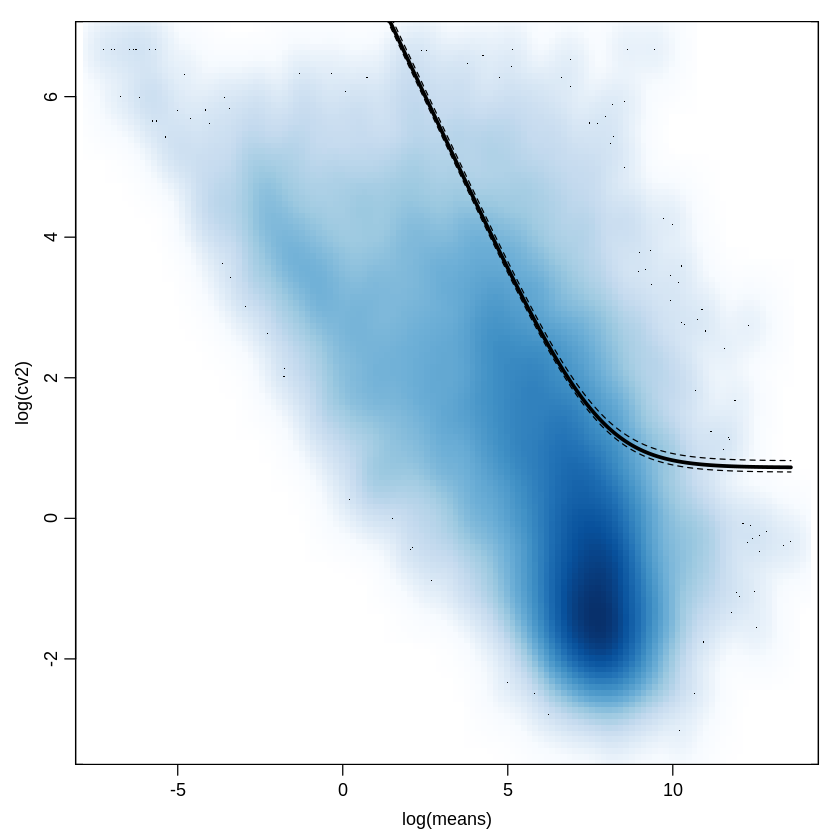

In [39]:
# repeat previous plot
par(mar=c(3.5,3.5,1,1),mgp=c(2,0.65,0),cex=0.9); 
smoothScatter(log(means),log(cv2));
xg <- exp(seq( min(log(means[means>0])), max(log(means)), length.out=1000 ))
vfit <- a1/xg + a0
# add fit line
lines( log(xg), log(vfit), col="black", lwd=3 )
df <- ncol(ed) - 1
# add confidence interval
lines(log(xg),log(vfit * qchisq(0.975,df)/df),lty=2,col="black")
lines(log(xg),log(vfit * qchisq(0.1,df)/df),lty=2,col="black")

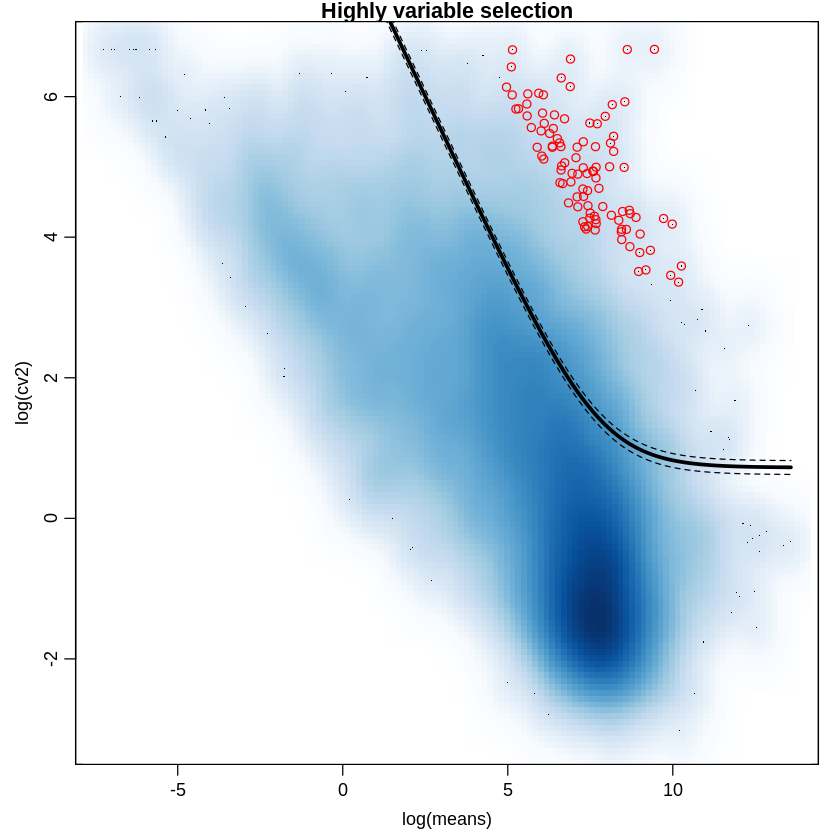

In [40]:
genesafit <- a1/means+a0
varFitRatio <- vars/(genesafit*means^2)
varorder <- order(varFitRatio,decreasing=T)
oed <- ed[varorder,]

# repeat previous plot
par(mar=c(3.5,3.5,1,1),mgp=c(2,0.65,0),cex=0.9)
smoothScatter(log(means),log(cv2), main="Highly variable selection"); 
lines(log(xg), log(vfit), col="black", lwd=3 ); 
lines(log(xg),log(vfit * qchisq(0.975,df)/df),lty=2,col="black"); 
lines(log(xg),log(vfit * qchisq(0.025,df)/df),lty=2,col="black");
# add top 100 genes
points(log(means[varorder[1:100]]),log(cv2[varorder[1:100]]),col=2)

In [41]:
genesafit <- a1/means+a0
varFitRatio <- vars/(genesafit*means^2)
varorder <- order(varFitRatio,decreasing=T)
oed <- ed[varorder,]

svg(paste(directory,"/cv2_mean.svg", sep=''))
# repeat previous plot
par(mar=c(3.5,3.5,1,1),mgp=c(2,0.65,0),cex=0.9)
smoothScatter(log(means),log(cv2), main="Highly variable selection"); 
lines(log(xg), log(vfit), col="black", lwd=3 ); 
lines(log(xg),log(vfit * qchisq(0.975,df)/df),lty=2,col="black"); 
lines(log(xg),log(vfit * qchisq(0.025,df)/df),lty=2,col="black");
# add top 100 genes
points(log(means[varorder[1:100]]),log(cv2[varorder[1:100]]),col=2)
dev.off()

png 
  2

In [42]:
m = ncol(rawdata)
fdr=0.0001
testDenom <- (means*a1 + means^2*cv2)/(1+cv2/m)
p <- 1-pchisq(vars * (m-1)/testDenom,m-1)
padj <- p.adjust(p,"BH")
sig <- padj < fdr
sig[is.na(sig)] <- FALSE

In [43]:
write.csv(table(genes=names(means)[varorder]),paste(directory,"/hv.csv", sep=''), row.names=FALSE)

In [91]:
#https://github.com/hemberg-lab/scRNA.seq.funcs/blob/master/R/brennecke.R
#https://www.nature.com/articles/nmeth.2645
Brennecke_getVariableGenes <- function(expr_mat, spikes=NA, suppress.plot=FALSE, fdr=0.1, minBiolDisp=0.5) {
        # require(statmod)

        rowVars <- function(x) { unlist(apply(x,1,var))}

        colGenes = "black"
        colSp = "grey35"


        fullCountTable <- expr_mat;

        if (is.character(spikes)) {
                sp = rownames(fullCountTable) %in% spikes;
                countsSp <- fullCountTable[sp,];
                countsGenes <- fullCountTable[!sp,];
        } else if (is.numeric(spikes)) {
                countsSp <- fullCountTable[spikes,];
                countsGenes <- fullCountTable[-spikes,];
        } else {
                countsSp = fullCountTable;
                countsGenes = fullCountTable;
        }

        meansSp = rowMeans(countsSp)
        varsSp = rowVars(countsSp)
        cv2Sp = varsSp/meansSp^2
        meansGenes = rowMeans(countsGenes)
        varsGenes = rowVars(countsGenes)
        cv2Genes = varsGenes/meansGenes^2
        # Fit Model
        minMeanForFit <- unname( quantile( meansSp[ which( cv2Sp > 0.01 ) ], 0.40))
        useForFit <- meansSp >= minMeanForFit
#        if (sum(useForFit) < 50) {
#                warning("Too few spike-ins exceed minMeanForFit, recomputing using all genes.")
#                meansAll = c(meansGenes, meansSp)
#                cv2All = c(cv2Genes,cv2Sp)
#                minMeanForFit <- unname( quantile( meansAll[ which( cv2All > 0.3 ) ], 0.80))
#                useForFit <- meansSp >= minMeanForFit
#        }
        if (sum(useForFit) < 30) {warning(paste("Only", sum(useForFit), "spike-ins to be used in fitting, may result in poor fit."))}
        fit <- glmgam.fit( cbind( a0 = 1, a1tilde = 1/meansSp[useForFit] ), cv2Sp[useForFit] )
        a0 <- unname( fit$coefficients["a0"] )
        a1 <- unname( fit$coefficients["a1tilde"])

        # Test
        psia1theta <- a1
        minBiolDisp <- minBiolDisp^2
        m = ncol(countsSp);
        cv2th <- a0 + minBiolDisp + a0 * minBiolDisp
        testDenom <- (meansGenes*psia1theta + meansGenes^2*cv2th)/(1+cv2th/m)
        p <- 1-pchisq(varsGenes * (m-1)/testDenom,m-1)
        padj <- p.adjust(p,"BH")
        sig <- padj < fdr
        sig[is.na(sig)] <- FALSE
        if (!suppress.plot) {
                plot( meansGenes,cv2Genes, xaxt="n", yaxt="n", log="xy",
                        xlab = "average normalized read count",
                        ylab = "squared coefficient of variation (CV^2)", col="white")
                axis( 1, 10^(-2:5), c( "0.01", "0.1", "1", "10", "100", "1000",
                        expression(10^4), expression(10^5) ) )
                axis( 2, 10^(-2:3), c( "0.01", "0.1", "1", "10", "100","1000" ), las=2 )
                abline( h=10^(-2:1), v=10^(-1:5), col="#D0D0D0", lwd=2 )
                # Plot the genes, use a different color if they are highly variable
                points( meansGenes, cv2Genes, pch=20, cex=.2,
                        col = ifelse( padj < .1, "#C0007090", colGenes ) )
		points( meansSp, cv2Sp, pch=20, cex=.5, col="blue1")
                # Add the technical noise fit
                xg <- 10^seq( -2, 6, length.out=1000 )
                lines( xg, (a1)/xg + a0, col="#FF000080", lwd=3 )
                # Add a curve showing the expectation for the chosen biological CV^2 thershold
                lines( xg, psia1theta/xg + a0 + minBiolDisp, lty="dashed", col="#C0007090", lwd=3)
        }
        return(names(meansGenes)[sig])
}


[1] "ENSG00000206072" "ENSG00000166634" "ENSG00000167768" "ENSG00000145451"
  [5] "ENSG00000107018" "ENSG00000167676" "ENSG00000057149" "ENSG00000197893"
  [9] "ENSG00000112818" "ENSG00000016602" "ENSG00000092054" "ENSG00000148677"
 [13] "ENSG00000123560" "ENSG00000118113" "ENSG00000120937" "ENSG00000145321"
 [17] "ENSG00000166819" "ENSG00000238269" "ENSG00000147571" "ENSG00000151962"
 [21] "ENSG00000166535" "ENSG00000198183" "ENSG00000145192" "ENSG00000069206"
 [25] "ENSG00000163218" "ENSG00000169906" "ENSG00000152266" "ENSG00000197430"
 [29] "ENSG00000078898" "ENSG00000124467" "ENSG00000143536" "ENSG00000198099"
 [33] "ENSG00000158887" "ENSG00000278272" "ENSG00000196844" "ENSG00000170323"
 [37] "ENSG00000255974" "ENSG00000115850" "ENSG00000163530" "ENSG00000203785"
 [41] "ENSG00000104760" "ENSG00000175535" "ENSG00000150201" "ENSG00000175121"
 [45] "ENSG00000164600" "ENSG00000134757" "ENSG00000147381" "ENSG00000141434"
 [49] "ENSG00000187690" "ENSG00000186474" "ENSG00000197953" "ENSG00000124721"
 [53] "ENSG00000125780" "ENSG00000151704" "ENSG00000143632" "ENSG00000170477"
 [57] "ENSG00000100867" "ENSG00000206073" "ENSG00000183347" "ENSG00000113327"
 [61] "ENSG00000163207" "ENSG00000104879" "ENSG00000168703" "ENSG00000171564"
 [65] "ENSG00000137975" "ENSG00000185966" "ENSG00000186526" "ENSG00000096006"
 [69] "ENSG00000178172" "ENSG00000181418" "ENSG00000178690" "ENSG00000167800"
 [73] "ENSG00000118271" "ENSG00000135346" "ENSG00000171401" "ENSG00000103546"
 [77] "ENSG00000073067" "ENSG00000091138" "ENSG00000205076" "ENSG00000160868"
 [81] "ENSG00000125998" "ENSG00000132446" "ENSG00000007952" "ENSG00000122711"
 [85] "ENSG00000184502" "ENSG00000108849" "ENSG00000177984" "ENSG00000254656"
 [89] "ENSG00000133710" "ENSG00000188508" "ENSG00000125414" "ENSG00000268089"
 [93] "ENSG00000143556" "ENSG00000186732" "ENSG00000103310" "ENSG00000178772"
 [97] "ENSG00000172551" "ENSG00000128218" "ENSG00000187533" "ENSG00000257017"
[101] "ENSG00000146469" "ENSG00000186847" "ENSG00000185269" "ENSG00000005981"
[105] "ENSG00000147256" "ENSG00000156096" "ENSG00000162624" "ENSG00000204278"
[109] "ENSG00000172179" "ENSG00000189182" "ENSG00000081051" "ENSG00000172689"
[113] "ENSG00000183607" "ENSG00000100448" "ENSG00000243137" "ENSG00000132677"
[117] "ENSG00000131686" "ENSG00000243130" "ENSG00000168314" "ENSG00000186160"
[121] "ENSG00000123999" "ENSG00000171487" "ENSG00000111245" "ENSG00000254647"
[125] "ENSG00000105695" "ENSG00000173991" "ENSG00000161270" "ENSG00000121552"
[129] "ENSG00000260548" "ENSG00000205592" "ENSG00000101441" "ENSG00000187689"
[133] "ENSG00000120094" "ENSG00000171951" "ENSG00000275896" "ENSG00000132874"
[137] "ENSG00000215182" "ENSG00000170426" "ENSG00000134812" "ENSG00000171209"
[141] "ENSG00000110680" "ENSG00000213218" "ENSG00000189001" "ENSG00000156009"
[145] "ENSG00000136541" "ENSG00000104327" "ENSG00000096264" "ENSG00000164893"
[149] "ENSG00000165192" "ENSG00000115593" "ENSG00000125816" "ENSG00000170054"
[153] "ENSG00000186487" "ENSG00000221878" "ENSG00000119715" "ENSG00000167634"
[157] "ENSG00000184144" "ENSG00000159224" "ENSG00000261272" "ENSG00000163216"
[161] "ENSG00000136872" "ENSG00000169344" "ENSG00000161610" "ENSG00000167618"
[165] "ENSG00000154227" "ENSG00000174792" "ENSG00000239474" "ENSG00000143194"
[169] "ENSG00000039987" "ENSG00000173335" "ENSG00000086159" "ENSG00000171711"
[173] "ENSG00000242515" "ENSG00000186832" "ENSG00000179914" "ENSG00000183862"
[177] "ENSG00000164076" "ENSG00000105675" "ENSG00000244094" "ENSG00000136110"
[181] "ENSG00000178363" "ENSG00000198883" "ENSG00000092758" "ENSG00000129988"
[185] "ENSG00000181752" "ENSG00000174992" "ENSG00000187922" "ENSG00000119614"
[189] "ENSG00000203837" "ENSG00000188770" "ENSG00000273079" "ENSG00000109072"
[193] "ENSG00000237353" "ENSG00000096088" "ENSG00000185559" "ENSG00000169469"
[197] "ENSG00000215853" "ENSG00000204544" "ENSG00000143355" "ENSG00000214711"
[201] "ENSG00000006116" "ENSG00000197745" "ENSG00000154646" "ENSG00000133742"
[205] "ENSG00000170423" 

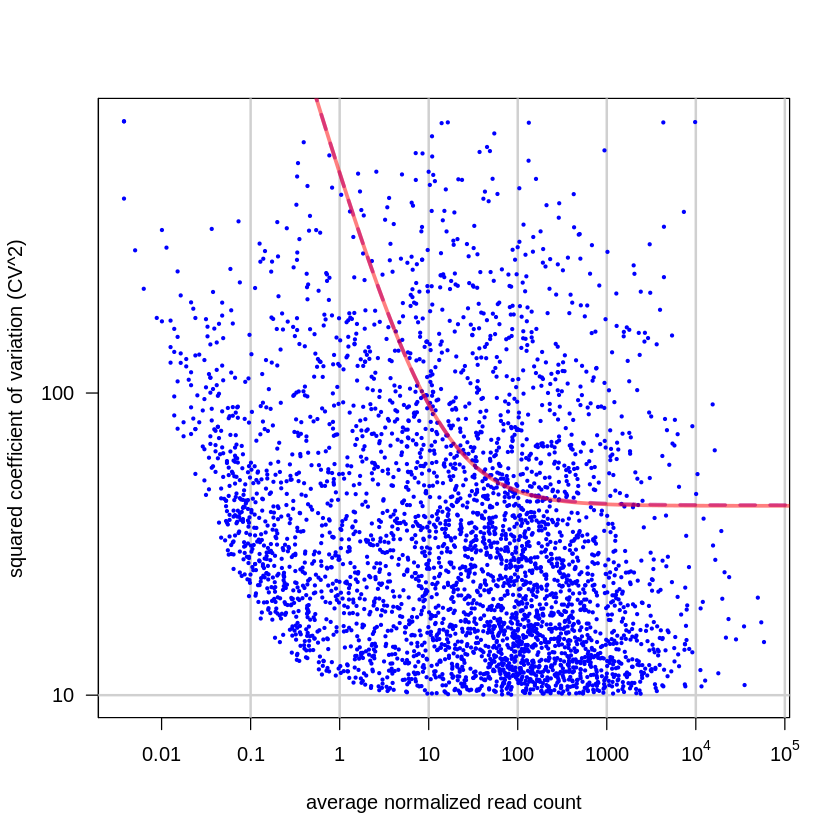

In [92]:
Brennecke_getVariableGenes(rawdata)

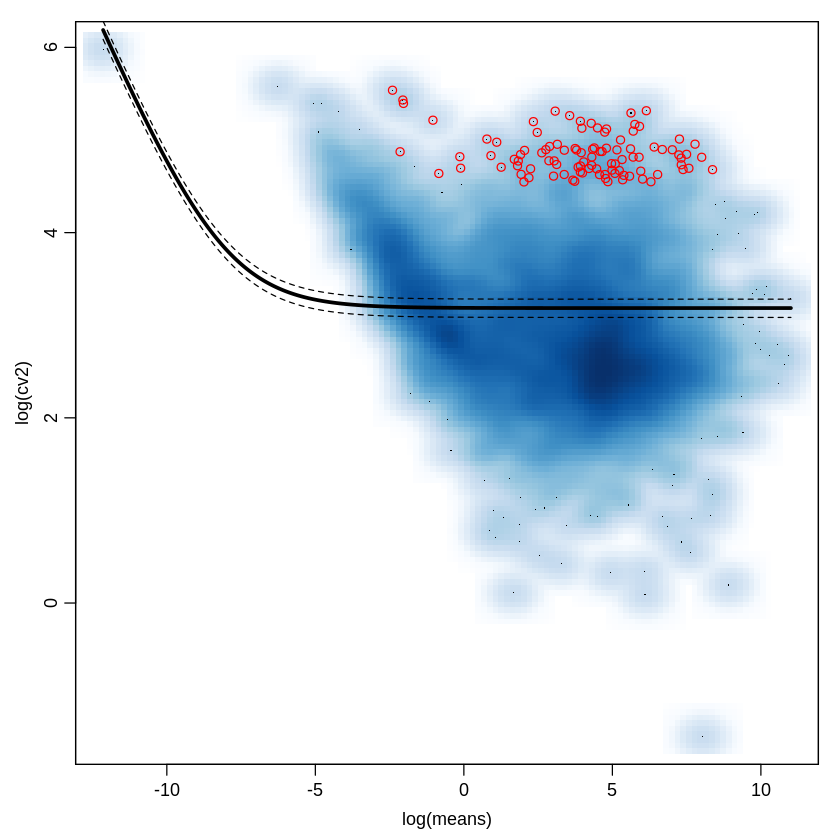

In [25]:
winsorize <- function (x, fraction=0.05) {
   if(length(fraction) != 1 || fraction < 0 ||
         fraction > 0.5) {
      stop("bad value for 'fraction'")
   }
   lim <- quantile(x, probs=c(fraction, 1-fraction))
   x[ x < lim[1] ] <- lim[1]
   x[ x > lim[2] ] <- lim[2]
   x
}

# winsorize to remove 2 most extreme cells (from each side)
wed <- t(apply(ed, 1, winsorize, fraction=2/ncol(ed)))

# now let's recalculate the most variable genes with the winsorized matrix (wed)
means = rowMeans(wed); vars = apply(wed,1,var); cv2 <- vars/means^2
useForFit <- means >= unname( quantile( means[ which( cv2 > .3 ) ], .1 ) ) 
fit <- glmgam.fit( cbind( a0 = 1, a1tilde = 1/means[useForFit] ),cv2[useForFit] )
afit <- fit$coef["a1tilde"]/means+fit$coef["a0"]
vfit <- fit$coef["a1tilde"]/xg+fit$coef["a0"]
varFitRatio <- vars/(afit*means^2)
varorder <- order(varFitRatio,decreasing=T)
oed <- wed[varorder,]

xg <- exp(seq( min(log(means[means>0])), max(log(means)), length.out=1000 ))
par(mar=c(3.5,3.5,1,1),mgp=c(2,0.65,0),cex=0.9); smoothScatter(log(means),log(cv2)); lines( log(xg), log(vfit), col="black", lwd=3 ); lines(log(xg),log(vfit * qchisq(0.975,df)/df),lty=2,col="black"); lines(log(xg),log(vfit * qchisq(0.025,df)/df),lty=2,col="black");
# add top 100 genes
points(log(means[varorder[1:100]]),log(cv2[varorder[1:100]]),col=2)

In [26]:
names(means)[varorder]

[1] "ENSG00000143536" "ENSG00000136694" "ENSG00000170465" "ENSG00000171209"
   [5] "ENSG00000185873" "ENSG00000203786" "ENSG00000169509" "ENSG00000228927"
   [9] "ENSG00000229859" "ENSG00000236424" "ENSG00000169474" "ENSG00000197641"
  [13] "ENSG00000258992" "ENSG00000187054" "ENSG00000203785" "ENSG00000224902"
  [17] "ENSG00000241794" "ENSG00000126233" "ENSG00000132446" "ENSG00000163209"
  [21] "ENSG00000184811" "ENSG00000196805" "ENSG00000163202" "ENSG00000171401"
  [25] "ENSG00000092345" "ENSG00000178172" "ENSG00000181092" "ENSG00000197745"
  [29] "ENSG00000110244" "ENSG00000154646" "ENSG00000189001" "ENSG00000168530"
  [33] "ENSG00000166819" "ENSG00000181617" "ENSG00000182938" "ENSG00000127074"
  [37] "ENSG00000115263" "ENSG00000198033" "ENSG00000171402" "ENSG00000134812"
  [41] "ENSG00000170423" "ENSG00000169906" "ENSG00000189052" "ENSG00000182333"
  [45] "ENSG00000170477" "ENSG00000164600" "ENSG00000184148" "ENSG00000105675"
  [49] "ENSG00000016490" "ENSG00000149452" "ENSG00000153002" "ENSG00000169605"
  [53] "ENSG00000172023" "ENSG00000167531" "ENSG00000253148" "ENSG00000214978"
  [57] "ENSG00000158639" "ENSG00000102891" "ENSG00000176194" "ENSG00000164822"
  [61] "ENSG00000152192" "ENSG00000129170" "ENSG00000172016" "ENSG00000153802"
  [65] "ENSG00000145879" "ENSG00000187533" "ENSG00000184330" "ENSG00000166634"
  [69] "ENSG00000185269" "ENSG00000254656" "ENSG00000186335" "ENSG00000173610"
  [73] "ENSG00000198183" "ENSG00000205420" "ENSG00000198883" "ENSG00000163216"
  [77] "ENSG00000255974" "ENSG00000110245" "ENSG00000203989" "ENSG00000186009"
  [81] "ENSG00000134760" "ENSG00000183607" "ENSG00000183347" "ENSG00000196344"
  [85] "ENSG00000111245" "ENSG00000205678" "ENSG00000164816" "ENSG00000057149"
  [89] "ENSG00000187690" "ENSG00000205777" "ENSG00000256713" "ENSG00000205916"
  [93] "ENSG00000131142" "ENSG00000131183" "ENSG00000079557" "ENSG00000161634"
  [97] "ENSG00000168757" "ENSG00000116218" "ENSG00000143556" "ENSG00000198092"
 [101] "ENSG00000105141" "ENSG00000163254" "ENSG00000229314" "ENSG00000205076"
 [105] "ENSG00000213417" "ENSG00000156282" "ENSG00000166049" "ENSG00000166535"
 [109] "ENSG00000198398" "ENSG00000179914" "ENSG00000186847" "ENSG00000140519"
 [113] "ENSG00000238269" "ENSG00000159527" "ENSG00000163810" "ENSG00000174697"
 [117] "ENSG00000214897" "ENSG00000171405" "ENSG00000198573" "ENSG00000135222"
 [121] "ENSG00000189023" "ENSG00000169469" "ENSG00000137975" "ENSG00000241635"
 [125] "ENSG00000092054" "ENSG00000154227" "ENSG00000171487" "ENSG00000154997"
 [129] "ENSG00000188120" "ENSG00000170323" "ENSG00000096395" "ENSG00000006116"
 [133] "ENSG00000168631" "ENSG00000172551" "ENSG00000160868" "ENSG00000261949"
 [137] "ENSG00000111049" "ENSG00000160349" "ENSG00000198077" "ENSG00000159516"
 [141] "ENSG00000240871" "ENSG00000172199" "ENSG00000178690" "ENSG00000124233"
 [145] "ENSG00000134757" "ENSG00000181698" "ENSG00000125998" "ENSG00000167580"
 [149] "ENSG00000156096" "ENSG00000189299" "ENSG00000104371" "ENSG00000169059"
 [153] "ENSG00000244057" "ENSG00000186526" "ENSG00000215853" "ENSG00000129988"
 [157] "ENSG00000274183" "ENSG00000186967" "ENSG00000135346" "ENSG00000105398"
 [161] "ENSG00000187288" "ENSG00000070808" "ENSG00000182187" "ENSG00000105954"
 [165] "ENSG00000105427" "ENSG00000074803" "ENSG00000105198" "ENSG00000233412"
 [169] "ENSG00000164893" "ENSG00000085465" "ENSG00000141668" "ENSG00000135443"
 [173] "ENSG00000198021" "ENSG00000185559" "ENSG00000185966" "ENSG00000110680"
 [177] "ENSG00000131482" "ENSG00000070915" "ENSG00000113889" "ENSG00000133636"
 [181] "ENSG00000132703" "ENSG00000212899" "ENSG00000169344" "ENSG00000204873"
 [185] "ENSG00000212725" "ENSG00000173335" "ENSG00000227234" "ENSG00000168484"
 [189] "ENSG00000260458" "ENSG00000253117" "ENSG00000178363" "ENSG00000198854"
 [193] "ENSG00000158104" "ENSG00000276076" "ENSG00000171711" "ENSG00000096088"
 [197] "ENSG00000156009" "ENSG00000188393" "ENSG00000205279" "ENSG00000122711"
 [201] "ENSG00000016602" "ENSG00000145384" "ENSG00000